In [94]:





import datetime
import pytz
import pandas as pd
import MetaTrader5 as mt5
import matplotlib.pyplot as plt
import numpy as np
import ta







In [95]:





# 30 min time frame
frameM30 = mt5.TIMEFRAME_M30

#1 min time frame
frameM1 = mt5.TIMEFRAME_M1

# 1 hour time frame
frameH1 = mt5.TIMEFRAME_H1





In [96]:





def getAssetList(assetSet = None):
    assetList = []
    if assetSet == 1:
        assetList = ['EURUSD', 'USDCHF']
    return assetList

        





In [97]:







## Defining the getQuotes method

def getQuotes(mt5TimeFrame, year = 2020, month = 1, day = 1, asset ='EURUSD'):
    
    ## Establishing the connection to MetaTrader 5
    if not mt5.initialize():
        print(f'MT5 initialization failed: Error code = {mt5.last_error}')
        quit()

    # Current time
    currentTime = datetime.datetime.now()

    # Defining the timezone and created utcFrom and utcTo dates
    timeZone = pytz.timezone('Asia/Kolkata')
    utcFrom = datetime.datetime(year, month, day, tzinfo = timeZone)
    utcTo = datetime.datetime(currentTime.year, currentTime.month, currentTime.day, tzinfo = timeZone)
    
    # Retrieving the data and returning it after converting it to pd dataframe
    return pd.DataFrame(mt5.copy_rates_range(asset, mt5TimeFrame, utcFrom, utcTo))







In [98]:



df = getQuotes(frameM30)
df





,time,open,high,low,close,tick_volume,spread,real_volume
0,1577817000,1.12215,1.12308,1.12215,1.12260,1972,7,0
1,1577818800,1.12261,1.12270,1.12224,1.12255,1278,7,0
2,1577820600,1.12255,1.12290,1.12230,1.12285,925,8,0
3,1577822400,1.12287,1.12287,1.12234,1.12241,631,7,0
4,1577824200,1.12242,1.12250,1.12222,1.12229,342,8,0
...,...,...,...,...,...,...,...,...
45509,1692806400,1.08039,1.08291,1.08031,1.08279,4893,8,0
45510,1692808200,1.08279,1.08444,1.08251,1.08374,9913,8,0
45511,1692810000,1.08373,1.08536,1.08344,1.08493,7991,8,0
45512,1692811800,1.08494,1.08530,1.08408,1.08452,4819,8,0


In [99]:





def ichimoku(df, kijunSenLookUp = 26, tenkanSenLookup = 9, chikouSpanShift = 26, senkouSpanBLookup= 52, senkouShift = 26):
    # Tenkan Sen Calculations
    tsh = df['high'].rolling(window=tenkanSenLookup).max()
    tsl = df['low'].rolling(window=tenkanSenLookup).min()
    df['tenkan_sen'] = (tsh + tsl) / 2

    # Kijun Sen Calculations
    ksh = df['high'].rolling(window=kijunSenLookup).max()
    ksl = df['low'].rolling(window=kijunSenLookup).min()
    df['kijun_sen'] = (ksh + ksl) / 2

    # Senkou Span A Calculations
    df['senkou_span_a'] = (((df['tenkan_sen'] + df['kijun_sen']) / 2))
    
    # Senkou Span B Calculations
    ssbh = df['high'].rolling(window=senkouSpanBLookup).max()
    ssbl = df['high'].rolling(window=senkouSpanBLookup).min()
    df['senkou_span_b'] = ((ssbh + ssbl) / 2)

    # Chikou Span Calculations
    df['chikou_span'] = df['close'].shift(-chikouSpanShift)

    # Senkou Span A, Senkou Span B Shift Calculation
    emptyRows = {'senkou_span_a': [np.nan] * senkouShift, 'senkou_span_b': [np.nan] * senkouShift}
    emptyRowsDf = pd.DataFrame(emptyRows)
    df = pd.concat([df, emptyRowsDf], ignore_index=True)
    df['senkou_span_a_shifted'] = df['senkou_span_a'].shift(senkouShift)
    df['senkou_span_b_shifted'] = df['senkou_span_b'].shift(senkouShift)

    return df







In [100]:








kijunSenLookup = 26
tenkanSenLookup = 9
chikouSpanShift = 26


df = ichimoku(df, kijunSenLookup, tenkanSenLookup, chikouSpanShift)

df









,time,open,high,low,close,tick_volume,spread,real_volume,tenkan_sen,kijun_sen,senkou_span_a,senkou_span_b,chikou_span,senkou_span_a_shifted,senkou_span_b_shifted
0,1.577817e+09,1.12215,1.12308,1.12215,1.12260,1972.0,7.0,0.0,NaN,NaN,NaN,NaN,1.12040,NaN,NaN
1,1.577819e+09,1.12261,1.12270,1.12224,1.12255,1278.0,7.0,0.0,NaN,NaN,NaN,NaN,1.12050,NaN,NaN
2,1.577821e+09,1.12255,1.12290,1.12230,1.12285,925.0,8.0,0.0,NaN,NaN,NaN,NaN,1.12070,NaN,NaN
3,1.577822e+09,1.12287,1.12287,1.12234,1.12241,631.0,7.0,0.0,NaN,NaN,NaN,NaN,1.12061,NaN,NaN
4,1.577824e+09,1.12242,1.12250,1.12222,1.12229,342.0,8.0,0.0,NaN,NaN,NaN,NaN,1.12095,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
45535,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082610,1.085035
45536,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.082993,1.085035
45537,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083223,1.084995
45538,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1.083223,1.084075


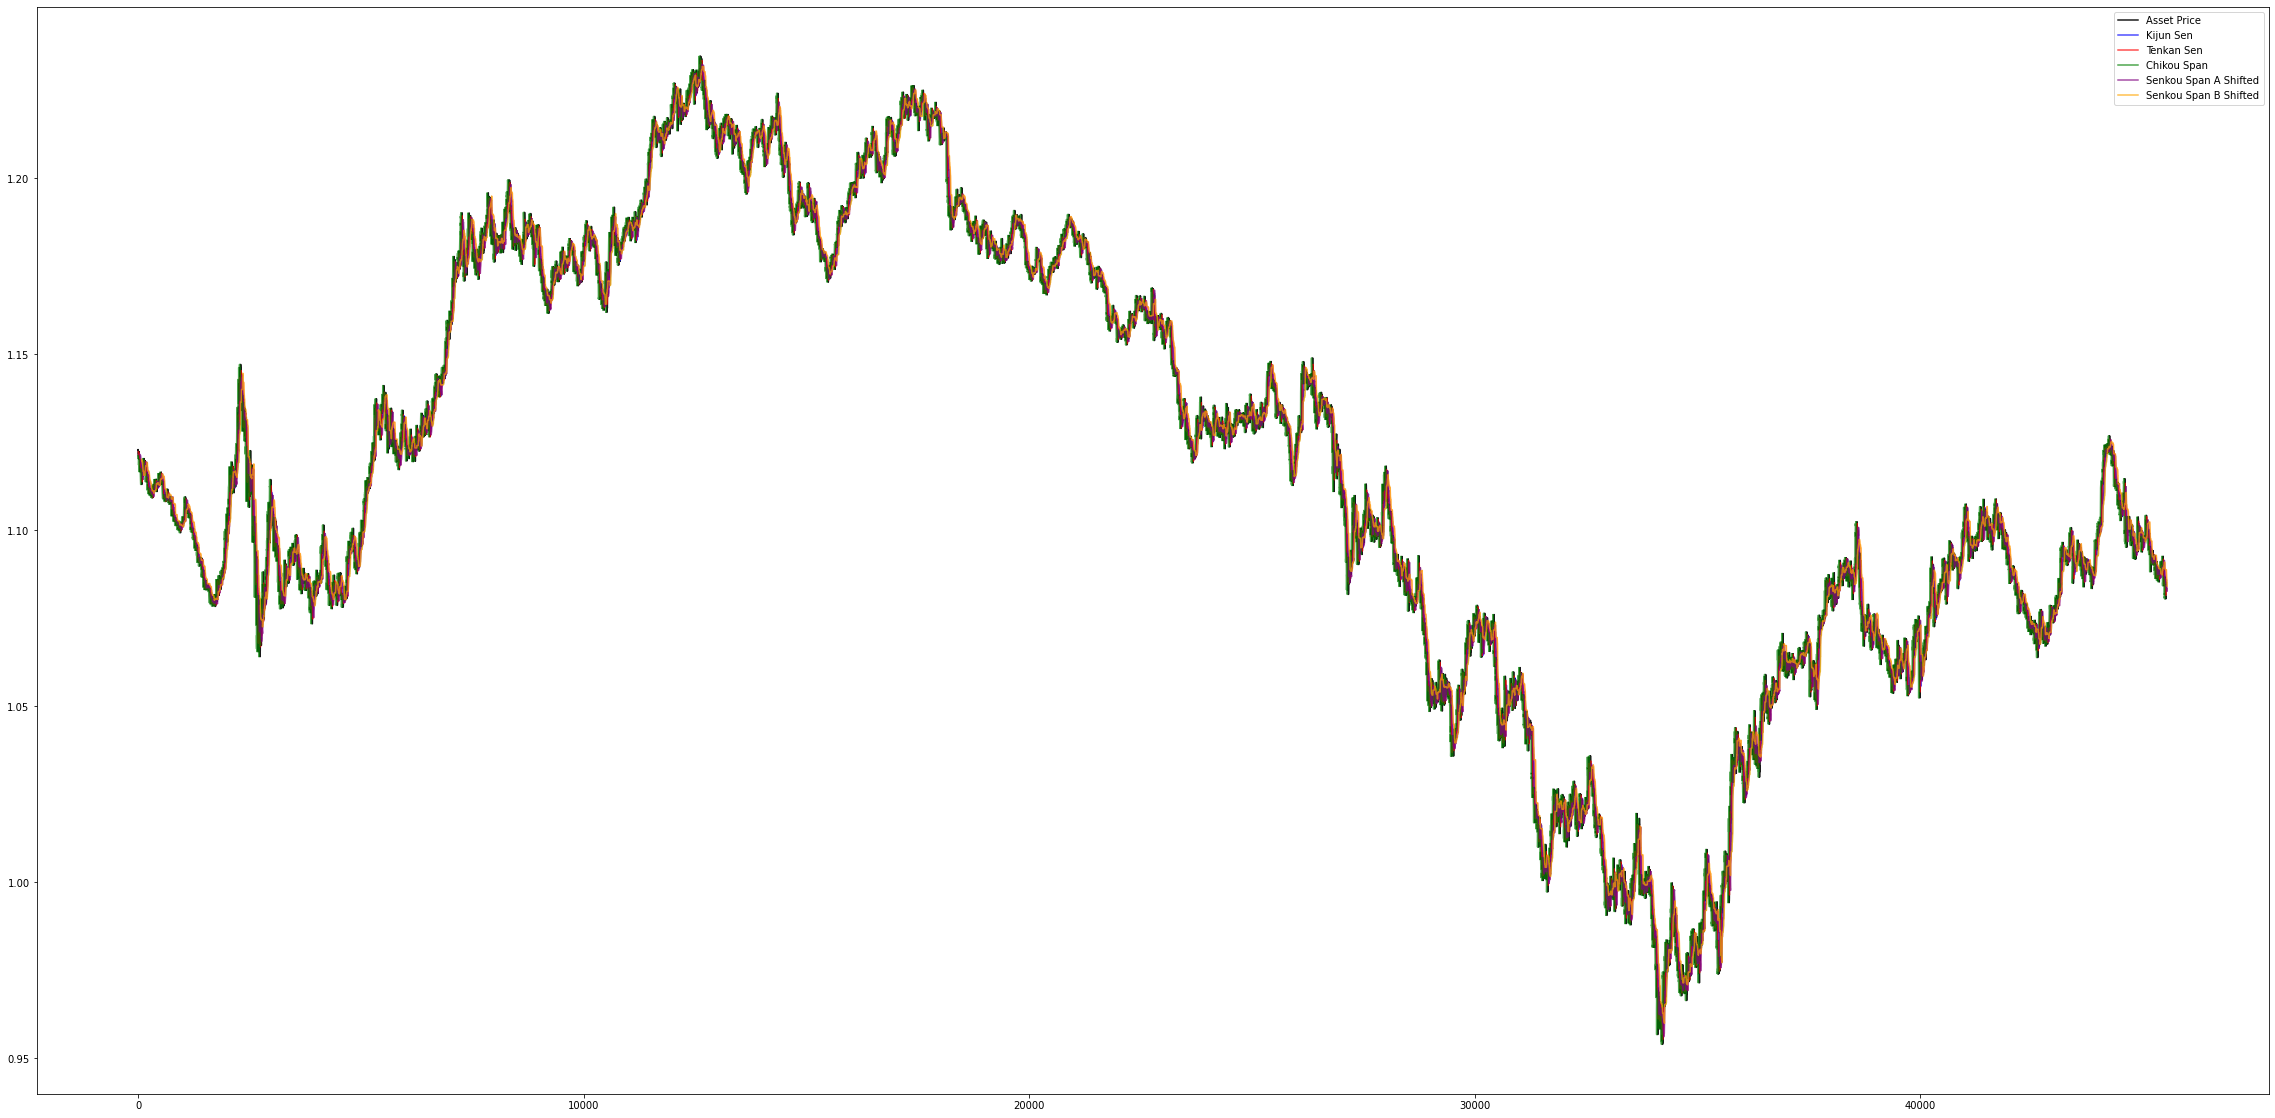

In [101]:





## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Asset Price', c='black', alpha=0.9)
plt.plot(df['kijun_sen'], label='Kijun Sen', c='blue', alpha=0.7)
plt.plot(df['tenkan_sen'], label='Tenkan Sen', c='red', alpha=0.7)
plt.plot(df['chikou_span'], label='Chikou Span', c='green', alpha=0.7)
plt.plot(df['senkou_span_a_shifted'], label='Senkou Span A Shifted', c='purple', alpha=0.7)
plt.plot(df['senkou_span_b_shifted'], label='Senkou Span B Shifted', c='orange', alpha=0.7)

# Shading the region between Senkou Span A and Senkou Span B
plt.fill_between(df.index, df['senkou_span_a_shifted'], df['senkou_span_b_shifted'], where=(df['senkou_span_a_shifted'] > df['senkou_span_b_shifted']), color='green', alpha=0.3)
plt.fill_between(df.index, df['senkou_span_a_shifted'], df['senkou_span_b_shifted'], where=(df['senkou_span_a_shifted'] < df['senkou_span_b_shifted']), color='red', alpha=0.3)

# Showing the plot
plt.legend()
plt.show()








## Strategy

- A long (Buy) signal is generated whenever the Tenkan-sen crosses the Kijun-sen from the below to the above while the market price is above the chimoku cloud. And finally, the chikou span's last value must be higher than the corresponding market price in the same point in time.

- A Short (Sell) signal is generated whenever the Tenkan-sen crosses the Kijun-sen from the above to the below while the market price is below the chimoku cloud. And finally, the chikou span's last value must be lower than the corresponding market price in the same point in time.


## Some other useful resources

- https://www.pythonforfinance.net/2019/06/26/ichimoku-trading-strategy-with-python/
- https://www.pythonforfinance.net/2019/06/27/ichimoku-trading-strategy-with-python-part-2/




In [102]:




buyIndices = []
sellIndices = []
buys = []
sells = []
openPosition = None
targetPrice = None
pctRise = 0.01

for i in range(chikouSpanShift + 2, len(df)):
    
    # Optionally we can also check if senkou_span_a_shifted > senkou_span_b_shifted -> Bullish Trend
    # If senkou_span_a_shifted < senkou_span_b_shifted -> Bearish Trend
    
    if (i > 0) and (openPosition is None) and (
            (df.iloc[i]['tenkan_sen'] > df.iloc[i]['kijun_sen']) and 
            (df.iloc[i - 1]['tenkan_sen'] < df.iloc[i - 1]['kijun_sen']) and 
            (df.iloc[i]['close'] > df.iloc[i]['senkou_span_a_shifted']) and 
            (df.iloc[i]['close'] > df.iloc[i]['senkou_span_b_shifted']) and 
            (df.iloc[i]['senkou_span_a_shifted'] > df.iloc[i]['senkou_span_b_shifted']) and 
            (df.iloc[i - chikouSpanShift]['chikou_span'] > df.iloc[i - chikouSpanShift]['close'])
        ):
        openPosition = 'long'
        buyIndices.append(i)
        buys.append(df.iloc[i]['close'])
        targetPrice = df.iloc[i]['close'] + (pctRise * df.iloc[i]['close'])
    elif (i > 0) and (openPosition) and (
        (
            (df.iloc[i]['tenkan_sen'] < df.iloc[i]['kijun_sen']) and 
            (df.iloc[i - 1]['tenkan_sen'] > df.iloc[i - 1]['kijun_sen']) and 
            (df.iloc[i]['close'] < df.iloc[i]['senkou_span_a_shifted']) and 
            (df.iloc[i]['close'] < df.iloc[i]['senkou_span_b_shifted']) and 
            (df.iloc[i]['senkou_span_a_shifted'] < df.iloc[i]['senkou_span_b_shifted']) and 
            (df.iloc[i - chikouSpanShift]['chikou_span'] < df.iloc[i - chikouSpanShift]['close'])
        ) or (
            (targetPrice) and 
            (df.iloc[i]['close'] > targetPrice)
        )):
        openPosition = None
        targetPrice = None
        sellIndices.append(i)
        sells.append(df.iloc[i]['close'])







In [103]:


print(buys)
print(sells)



[1.11328, 1.102, 1.08334, 1.10393, 1.13476, 1.14002, 1.08108, 1.09472, 1.09847, 1.11899, 1.12641, 1.14321, 1.15834, 1.1782, 1.1857, 1.18589, 1.17542, 1.17493, 1.18758, 1.21597, 1.22273, 1.2143, 1.21251, 1.21377, 1.17802, 1.19864, 1.20941, 1.21558, 1.22045, 1.19273, 1.17964, 1.18035, 1.16115, 1.15944, 1.12234, 1.13284, 1.14644, 1.13909, 1.09237, 1.09827, 1.07225, 1.0534, 1.01658, 1.02426, 1.0029, 0.99952, 1.00113, 0.9859, 1.03354, 1.03918, 1.03655, 1.04445, 1.0706, 1.06262, 1.06257, 1.07473, 1.08531, 1.0735, 1.05938, 1.09147, 1.10708, 1.08212, 1.09598, 1.09237, 1.09115, 1.09927, 1.08975]
[1.10838, 1.10357, 1.09474, 1.11628, 1.14613, 1.12671, 1.0921, 1.08362, 1.1099, 1.13431, 1.12111, 1.14369, 1.17097, 1.19005, 1.1991, 1.17426, 1.16981, 1.18699, 1.19968, 1.21764, 1.2237, 1.21404, 1.20374, 1.21387, 1.19074, 1.21087, 1.20212, 1.21921, 1.21166, 1.19055, 1.17169, 1.18364, 1.15982, 1.1585, 1.13366, 1.13157, 1.14184, 1.13365, 1.10482, 1.11094, 1.07103, 1.04806, 1.01945, 1.03549, 1.01437, 0.999

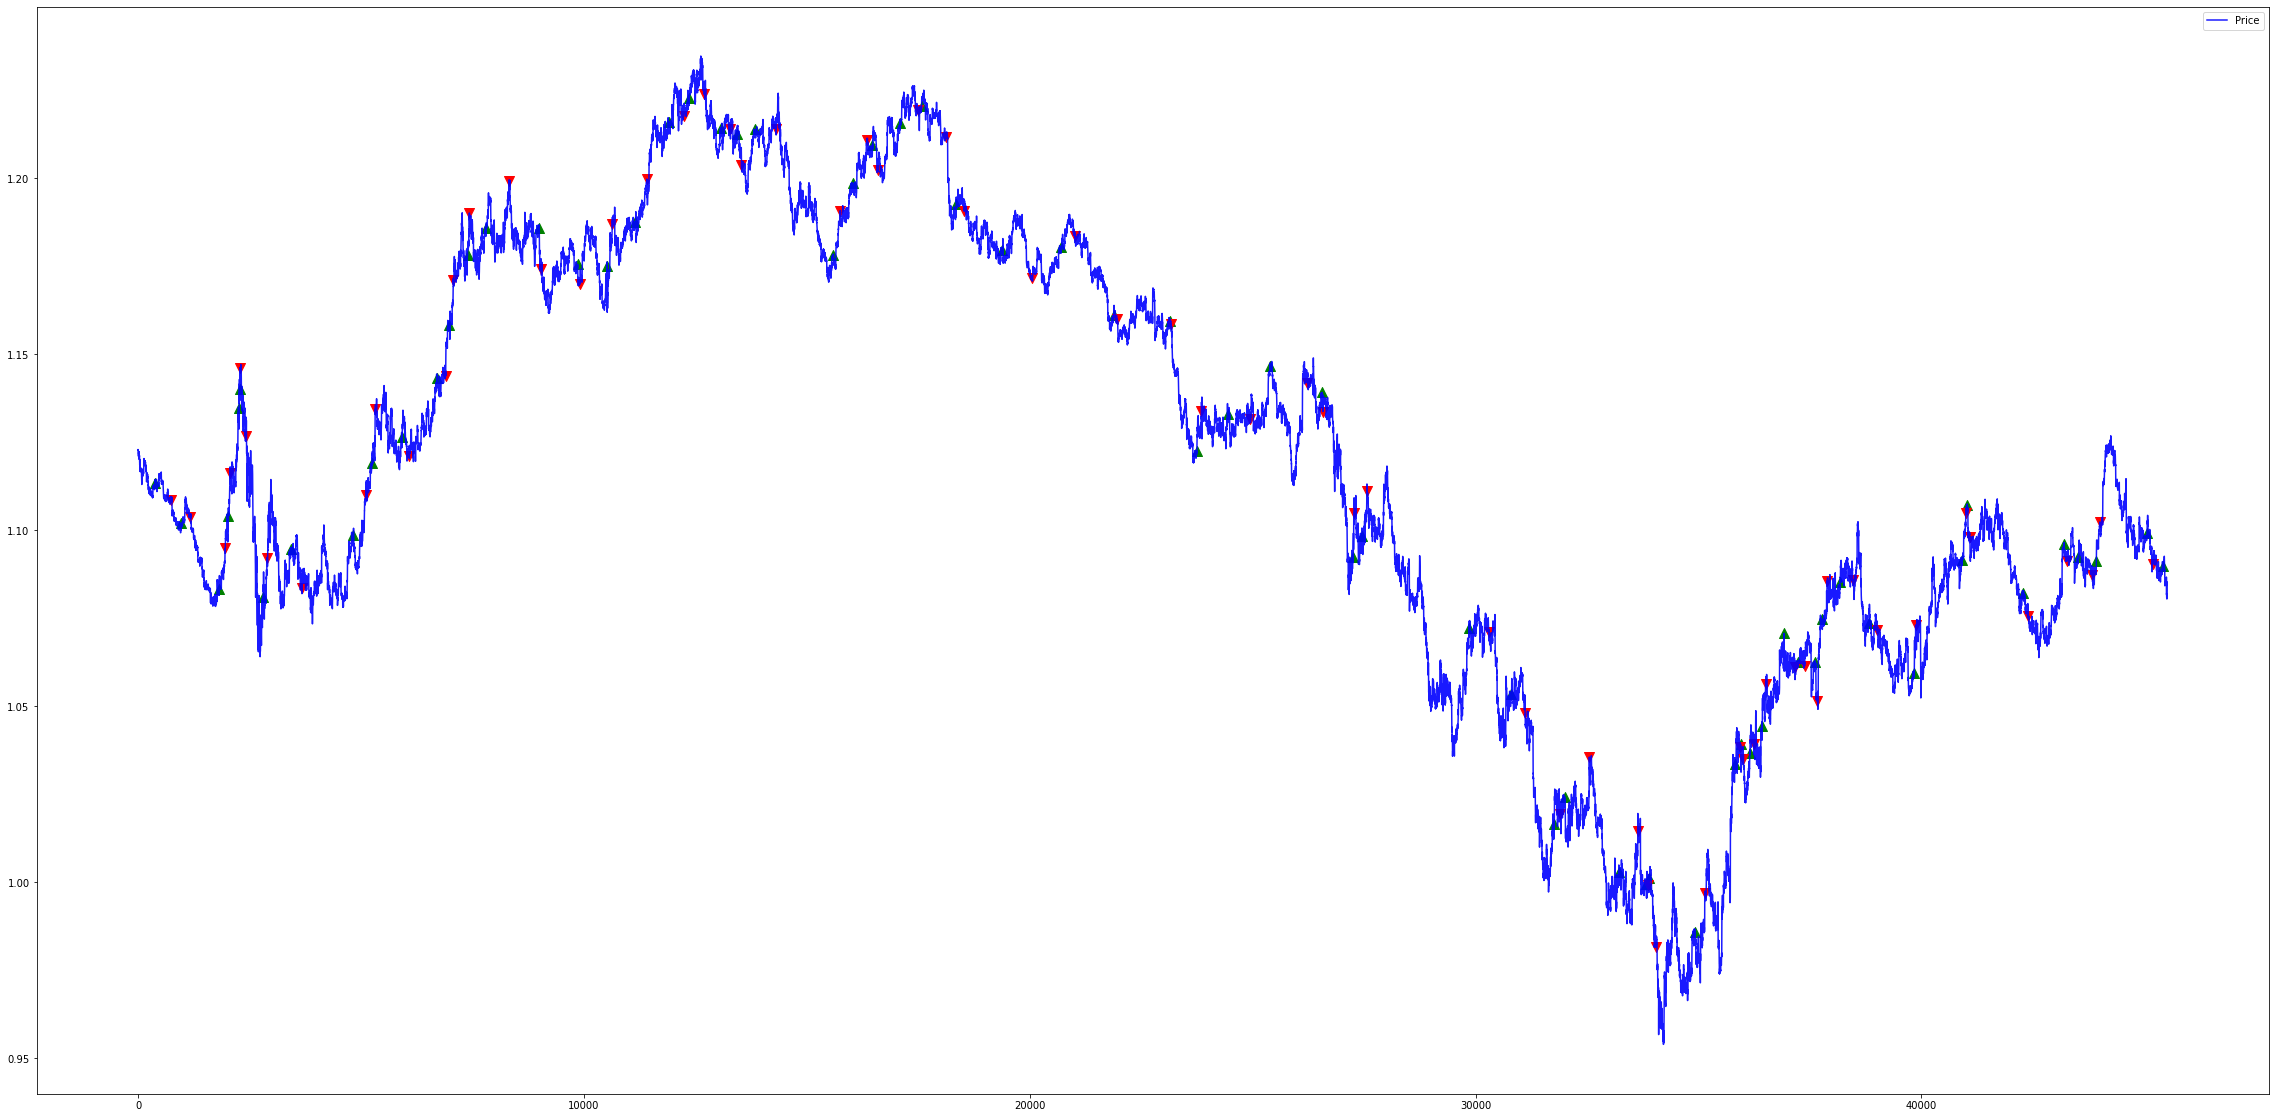

In [104]:











## Increasing the figure size
plt.figure(figsize = (40, 20))

## Plotting the Asset Price.
plt.plot(df['close'], label='Price', c='blue', alpha=0.9)
plt.scatter(df.iloc[buyIndices].index, df.iloc[buyIndices]['close'], marker = '^', color = 'g', s = 100)
plt.scatter(df.iloc[sellIndices].index, df.iloc[sellIndices]['close'], marker = 'v', color = 'r', s = 100)

# Showing the plot
plt.legend()
plt.show()














In [105]:






# P & L and other details

totalPL = 0
winTrades = 0
loseTrades = 0
maximumWin = None
maximumLose = None
maximumPercentageWin = None
maximumPercentageLoss = None

for i in range(len(sells)):
    netResult = sells[i] - buys[i]
    maximumValue = max(sells[i], buys[i])
    netResult = netResult - (0.002 * maximumValue);
    percentageWinOrLoss = (netResult / maximumValue) * 100
    message = None

    if netResult < 0:
        loseTrades += 1
        message = f'Lost {percentageWinOrLoss}'
    else:
        winTrades += 1
        message = f'Win {percentageWinOrLoss}'

    if not maximumWin or netResult > maximumWin:
        maximumWin = netResult

    if not maximumLose or netResult < maximumLose:
        maximumLose = netResult

    if not maximumPercentageWin or percentageWinOrLoss > maximumPercentageWin:
        maximumPercentageWin = percentageWinOrLoss

    if not maximumPercentageLoss or percentageWinOrLoss < maximumPercentageLoss:
        maximumPercentageLoss = percentageWinOrLoss

    totalPL = totalPL + netResult
    print(message)

print(f'Total P & L = {totalPL}')
print(f'Win Trades = {winTrades}')
print(f'Lose Trades = {loseTrades}')
print(f'Maximum Win = {maximumWin}')
print(f'Maximum Lose = {maximumLose}')
print(f'Maximum Percentage Win = {maximumPercentageWin}')
print(f'MaximumPercentage Loss = {maximumPercentageLoss}')






Lost -0.6401408450704339
Lost -0.05773444366919639
Win 0.8413431499716897
Win 0.9063532447056171
Win 0.7920340624536572
Lost -1.3675233767828576
Win 0.8090651039282143
Lost -1.2139579070447137
Win 0.8298225065321244
Win 1.150600805776199
Lost -0.6705213909677525
Lost -0.15803058521102434
Win 0.8785929613909955
Win 0.7957564808201453
Win 0.9175047952631206
Lost -1.1806980411336658
Lost -0.6772762076534254
Win 0.8160152992021804
Win 0.8086022939450519
Lost -0.06284944647021613
Lost -0.12073220560595609
Lost -0.2214115128057257
Lost -0.9232930037690366
Lost -0.19176188553963858
Win 0.8682432772897394
Win 0.8100175906579536
Lost -0.8027732530738143
Win 0.09773377843027865
Lost -0.9202261460936602
Lost -0.38277397231561805
Lost -0.8739344206707236
Win 0.0779561353114135
Lost -0.31454161822329857
Lost -0.2810736217484252
Win 0.7985357161759256
Lost -0.31210762331839487
Lost -0.6012421059976918
Lost -0.6775742039698258
Win 0.9268803968067063
Win 0.9404756332475164
Lost -0.31377943576591266
Lo